## Importing Libraries and Datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import regularizers
from keras import backend as K
from keras.datasets import mnist


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


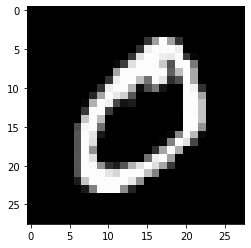

In [3]:
# Visualize a sample image
plt.imshow(x_train[1], cmap = 'gray')

In [4]:
# Check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# Check out the shape of the testing data
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

## Perform Data Visualization

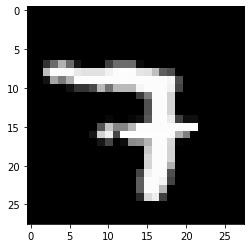

In [8]:
# Viewing a random image
r = random.randint(1, 60000)
plt.imshow(x_train[r], cmap = 'gray')

In [9]:
# Printing the class of the random image
label = y_train[r]
print(label)

7


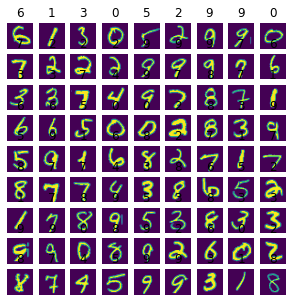

In [11]:
# Viewing some images in grid format
# Defining Dimensions of the grid
W_grid = 9
L_grid = 9

fig, axes = plt.subplots(L_grid, W_grid, figsize = (5, 5))

axes = axes.ravel()    # Flatten the 10X10 grid into 100 array

n_training = len(x_train)    # Length of the training dataset

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)    # Select a random number from 0 to n_training
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 12)
    axes[i].axis('off')

## Data Preprocessing

In [12]:
# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
# Add some noice to training and testing datasets
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

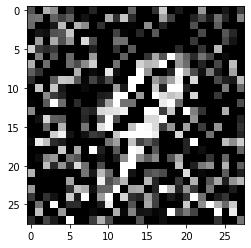

In [14]:
# Plotting a random image for added noise in training dataset
plt.imshow(x_train_noisy[22].reshape(28, 28), cmap = 'gray')

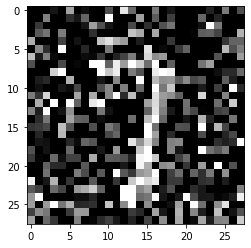

In [15]:
# Plotting a random image for added noise in testing dataset
plt.imshow(x_test_noisy[234].reshape(28, 28), cmap = 'gray')

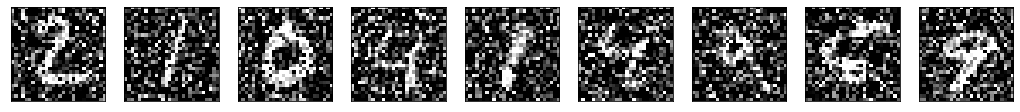

In [16]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Build and Train Autoencoder Deep Learning Mode

In [17]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0   

In [19]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1759 - accuracy: 0.8034 - val_loss: 0.1299 - val_accuracy: 0.8018
Epoch 2/50
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1201 - accuracy: 0.8096 - val_loss: 0.1179 - val_accuracy: 0.8120
Epoch 3/50
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1119 - accuracy: 0.8111 - val_loss: 0.1078 - val_accuracy: 0.8118
Epoch 4/50
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1082 - accuracy: 0.8118 - val_loss: 0.1077 - val_accuracy: 0.8123
Epoch 5/50
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1059 - accuracy: 0.8122 - val_loss: 0.1033 - val_accuracy: 0.8108
Epoch 6/50
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1043 - accuracy: 0.8124 - val_loss: 0.1021 - val_accuracy: 0.8122
Epoch 7/50
60000/60000 [==============================] - 158s

## Evaluate Trained model Performance

In [20]:
evaluation = autoencoder.evaluate(x_test_noisy.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print(evaluation)

10000/10000 [==============================] - 7s 689us/step
[0.09562280176877976, 0.8129435181617737]


In [21]:
decoded_imgs = autoencoder.predict(x_test)

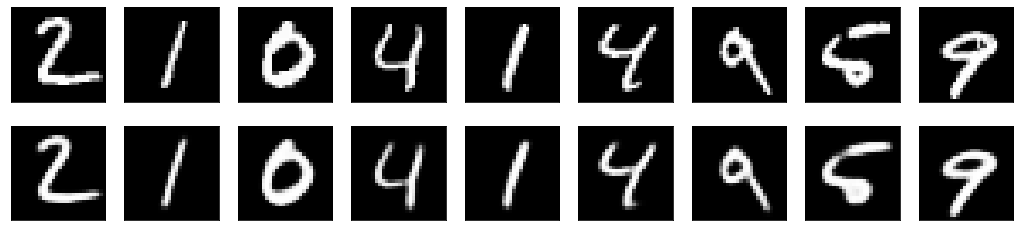

In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()